In [2]:
import os

In [3]:
os.chdir("../")
%pwd

'/Users/macbookpro/Documents/predict_publications/publications_prediction'

In [4]:
import pandas as pd

In [5]:
test_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/test_data.csv')
train_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/train_data.csv')
validation_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/validation_data.csv')

In [6]:
# Convert 'timestamp' to a datetime format
train_data['date'] = pd.to_datetime(train_data['timestamp'], unit='s')

# Extracting the hour from the 'date' column
train_data['hour'] = train_data['date'].dt.hour

# Aggregate data based on 'hour', 'lon', and 'lat'
agg_columns = {
    'likescount': 'mean',
    'commentscount': 'mean',
    'symbols_cnt': 'mean',
    'words_cnt': 'mean',
    'hashtags_cnt': 'mean',
    'mentions_cnt': 'mean',
    'links_cnt': 'mean',
    'emoji_cnt': 'mean',
}

grouped_data = train_data.groupby(['timestamp', 'lon', 'lat', 'point', 'hour']).agg(agg_columns).reset_index()
grouped_data.head()


,timestamp,lon,lat,point,hour,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt
0,1546300800,0.000000,0.000000,0101000020E61000000000000000000000000000000000...,0,31.666667,1.666667,51.333333,2.000000,2.000000,0.0,0.0,0.000000
1,1546300800,30.136232,60.000054,0101000020E6100000B8E59619E0223E40ABB649C80100...,0,52.000000,1.000000,28.000000,0.500000,2.000000,0.0,0.0,0.500000
2,1546300800,30.138478,59.835705,0101000020E610000077D0A94773233E4097654065F8EA...,0,32.000000,0.333333,46.000000,2.333333,3.000000,0.0,0.0,1.333333
3,1546300800,30.142969,60.023627,0101000020E6100000F5A5CFA399243E400B9A5B330603...,0,77.666667,3.333333,34.666667,2.666667,0.666667,0.0,0.0,1.666667
4,1546300800,30.142969,60.030359,0101000020E6100000F5A5CFA399243E40854A58CAE203...,0,19.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [7]:
grouped_data['publication_count'] = train_data.groupby(['timestamp', 'hour', 'lon', 'lat', 'point']).size().values
grouped_data.head()

,timestamp,lon,lat,point,hour,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,publication_count
0,1546300800,0.000000,0.000000,0101000020E61000000000000000000000000000000000...,0,31.666667,1.666667,51.333333,2.000000,2.000000,0.0,0.0,0.000000,3
1,1546300800,30.136232,60.000054,0101000020E6100000B8E59619E0223E40ABB649C80100...,0,52.000000,1.000000,28.000000,0.500000,2.000000,0.0,0.0,0.500000,2
2,1546300800,30.138478,59.835705,0101000020E610000077D0A94773233E4097654065F8EA...,0,32.000000,0.333333,46.000000,2.333333,3.000000,0.0,0.0,1.333333,3
3,1546300800,30.142969,60.023627,0101000020E6100000F5A5CFA399243E400B9A5B330603...,0,77.666667,3.333333,34.666667,2.666667,0.666667,0.0,0.0,1.666667,3
4,1546300800,30.142969,60.030359,0101000020E6100000F5A5CFA399243E40854A58CAE203...,0,19.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1


In [22]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635541 entries, 0 to 3635540
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          int64  
 1   lon                float64
 2   lat                float64
 3   point              object 
 4   hour               int32  
 5   likescount         float64
 6   commentscount      float64
 7   symbols_cnt        float64
 8   words_cnt          float64
 9   hashtags_cnt       float64
 10  mentions_cnt       float64
 11  links_cnt          float64
 12  emoji_cnt          float64
 13  publication_count  int64  
dtypes: float64(10), int32(1), int64(2), object(1)
memory usage: 374.4+ MB


In [8]:
# Drop 'timestamp' as it's strongly correlated with other time features and may cause data leakage
X_train = grouped_data.drop(['publication_count', 'timestamp', 'point'], axis=1)
y_train = grouped_data['publication_count']

In [9]:
X_train.shape, y_train.shape

((3635541, 11), (3635541,))

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635541 entries, 0 to 3635540
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lon            float64
 1   lat            float64
 2   hour           int32  
 3   likescount     float64
 4   commentscount  float64
 5   symbols_cnt    float64
 6   words_cnt      float64
 7   hashtags_cnt   float64
 8   mentions_cnt   float64
 9   links_cnt      float64
 10  emoji_cnt      float64
dtypes: float64(10), int32(1)
memory usage: 291.2 MB


In [11]:
# Convert the 'hour' column to a datetime format
test_data['date'] = pd.to_datetime(test_data['hour'], unit='s')

# Drop the original 'hour' column which contains the timestamp
test_data.drop(columns=['hour'], inplace=True)

# Extract the datetime features from the 'date' column
test_data['hour'] = test_data['date'].dt.hour
test_data['day'] = test_data['date'].dt.day
test_data['dayofweek'] = test_data['date'].dt.dayofweek
test_data['month'] = test_data['date'].dt.month

# Drop the 'date' column as it's not needed for prediction
test_data.drop(columns=['date'], inplace=True)

# Set 'point' as the index for both datasets
train_data.set_index('point', inplace=True)
test_data.set_index('point', inplace=True)

# List of features to create in the test dataset
features_to_create = ['likescount', 'commentscount', 'symbols_cnt', 'words_cnt', 
                      'hashtags_cnt', 'mentions_cnt', 'links_cnt', 'emoji_cnt']

# Aggregate the training dataset based on 'point' and compute the median for each feature
aggregated_data = train_data[features_to_create].groupby('point').median()

# Merge the test dataset with the aggregated training data on 'point'
test_data = test_data.join(aggregated_data, on='point', how='left')

# Reset index for both datasets after the operations
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

X_test = test_data.drop(['sum', 'point', 'error'], axis=1)
y_test = test_data['sum']
X_test = X_test[X_train.columns]


In [12]:
X_test.shape, y_test.shape

((700, 11), (700,))

In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lon            700 non-null    float64
 1   lat            700 non-null    float64
 2   hour           700 non-null    int32  
 3   likescount     700 non-null    float64
 4   commentscount  700 non-null    float64
 5   symbols_cnt    700 non-null    float64
 6   words_cnt      700 non-null    float64
 7   hashtags_cnt   700 non-null    float64
 8   mentions_cnt   700 non-null    float64
 9   links_cnt      700 non-null    float64
 10  emoji_cnt      700 non-null    float64
dtypes: float64(10), int32(1)
memory usage: 57.5 KB


In [14]:
X_test.head()

,lon,lat,hour,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt
0,30.331616,59.934863,10,44.0,1.0,73.0,4.0,0.0,0.0,0.0,1.0
1,30.329370,59.940488,11,41.0,1.0,47.0,2.0,0.0,0.0,0.0,0.0
2,30.297929,59.905597,16,28.0,0.0,42.0,2.0,0.0,0.0,0.0,0.0
3,30.356319,59.921358,13,48.0,1.0,110.0,6.0,0.0,0.0,0.0,1.0
4,30.315895,59.939363,13,47.0,1.0,49.0,2.0,0.0,0.0,0.0,0.0


In [15]:
y_train.head(), y_test.head()

(0    3
 1    2
 2    3
 3    3
 4    1
 Name: publication_count, dtype: int64,
 0     7
 1     6
 2     5
 3    16
 4    10
 Name: sum, dtype: int64)

# RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calculating the relative error for the Gradient Boosting model predictions
rf_relative_errors = np.abs(rf_predictions - y_test) / rf_predictions
rf_average_relative_error = rf_relative_errors.mean()


print(f"ARE: {rf_average_relative_error}")
print(f"RMSE: {rf_rmse}")

ARE: 7.192154745845674
RMSE: 10.642302552301723


# GradientBoostingRegressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=8, learning_rate=0.0895527640998049, subsample=0.5970487514167024, min_samples_split=20, min_samples_leaf=4, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.0895527640998049, max_depth=8,
                          min_samples_leaf=4, min_samples_split=20,
                          random_state=42, subsample=0.5970487514167024)

In [37]:
# Predict using the Gradient Boosting model
gb_predictions = gb_model.predict(X_test)  # gb_model is already loaded and trained

# Evaluate the Gradient Boosting model
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

# Calculating the relative error for the Gradient Boosting model predictions
gb_relative_errors = np.abs(gb_predictions - y_test) / gb_predictions
gb_average_relative_error = gb_relative_errors.mean()
gb_average_relative_error

6.1216475882308625

# LSTM

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for LSTM [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [42]:
from keras.models import Sequential, clone_model, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

best_model = None
lowest_val_loss = float('inf')

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_reshaped):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = create_lstm_model()
    
    # Use ModelCheckpoint to save the model with the lowest validation loss
    checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    # Check if this fold's model is better than the previous best model
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_model = clone_model(model)
        best_model.load_weights('best_model.h5')  # Corrected this line
        best_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss


Epoch 1/10
18936/18936 - 38s - loss: 5.9658 - val_loss: 15.1784 - 38s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 31s - loss: 5.5741 - val_loss: 15.0742 - 31s/epoch - 2ms/step
Epoch 3/10
18936/18936 - 33s - loss: 5.5027 - val_loss: 15.0109 - 33s/epoch - 2ms/step
Epoch 4/10
18936/18936 - 46s - loss: 5.4651 - val_loss: 15.0175 - 46s/epoch - 2ms/step
Epoch 5/10
18936/18936 - 35s - loss: 5.4414 - val_loss: 14.9771 - 35s/epoch - 2ms/step
Epoch 6/10
18936/18936 - 31s - loss: 5.2663 - val_loss: 14.0115 - 31s/epoch - 2ms/step
Epoch 7/10
18936/18936 - 31s - loss: 4.9157 - val_loss: 13.2343 - 31s/epoch - 2ms/step
Epoch 8/10
18936/18936 - 32s - loss: 4.6967 - val_loss: 12.8222 - 32s/epoch - 2ms/step
Epoch 9/10
18936/18936 - 31s - loss: 4.5588 - val_loss: 12.2603 - 31s/epoch - 2ms/step
Epoch 10/10
18936/18936 - 31s - loss: 4.4451 - val_loss: 11.9213 - 31s/epoch - 2ms/step


Epoch 1/10
37871/37871 - 60s - loss: 9.7862 - val_loss: 19.5447 - 60s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37871/37871 - 56s - loss: 9.4276 - val_loss: 19.2339 - 56s/epoch - 1ms/step
Epoch 3/10
37871/37871 - 55s - loss: 8.9569 - val_loss: 16.5924 - 55s/epoch - 1ms/step
Epoch 4/10
37871/37871 - 55s - loss: 7.9509 - val_loss: 15.3307 - 55s/epoch - 1ms/step
Epoch 5/10
37871/37871 - 55s - loss: 7.4873 - val_loss: 14.8721 - 55s/epoch - 1ms/step
Epoch 6/10
37871/37871 - 55s - loss: 7.1752 - val_loss: 14.5492 - 55s/epoch - 1ms/step
Epoch 7/10
37871/37871 - 56s - loss: 6.9342 - val_loss: 14.2609 - 56s/epoch - 1ms/step
Epoch 8/10
37871/37871 - 55s - loss: 6.8051 - val_loss: 14.1141 - 55s/epoch - 1ms/step
Epoch 9/10
37871/37871 - 53s - loss: 6.7203 - val_loss: 13.9541 - 53s/epoch - 1ms/step
Epoch 10/10
37871/37871 - 54s - loss: 6.6575 - val_loss: 13.8668 - 54s/epoch - 1ms/step


Epoch 1/10
56806/56806 - 81s - loss: 12.8137 - val_loss: 13.8385 - 81s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56806/56806 - 77s - loss: 12.2011 - val_loss: 12.7327 - 77s/epoch - 1ms/step
Epoch 3/10
56806/56806 - 77s - loss: 10.5365 - val_loss: 11.1570 - 77s/epoch - 1ms/step
Epoch 4/10
56806/56806 - 77s - loss: 9.7456 - val_loss: 10.5111 - 77s/epoch - 1ms/step
Epoch 5/10
56806/56806 - 76s - loss: 9.3535 - val_loss: 10.1647 - 76s/epoch - 1ms/step
Epoch 6/10
56806/56806 - 77s - loss: 9.1093 - val_loss: 9.9362 - 77s/epoch - 1ms/step
Epoch 7/10
56806/56806 - 76s - loss: 8.9857 - val_loss: 9.9428 - 76s/epoch - 1ms/step
Epoch 8/10
56806/56806 - 76s - loss: 8.8926 - val_loss: 9.7164 - 76s/epoch - 1ms/step
Epoch 9/10
56806/56806 - 77s - loss: 8.8172 - val_loss: 9.6767 - 77s/epoch - 1ms/step
Epoch 10/10
56806/56806 - 76s - loss: 8.7491 - val_loss: 9.6162 - 76s/epoch - 1ms/step


Epoch 1/10
75741/75741 - 104s - loss: 12.9510 - val_loss: 16.6935 - 104s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75741/75741 - 101s - loss: 10.6282 - val_loss: 15.0068 - 101s/epoch - 1ms/step
Epoch 3/10
75741/75741 - 99s - loss: 9.7165 - val_loss: 14.2457 - 99s/epoch - 1ms/step
Epoch 4/10
75741/75741 - 99s - loss: 9.3560 - val_loss: 13.8898 - 99s/epoch - 1ms/step
Epoch 5/10
75741/75741 - 98s - loss: 9.1539 - val_loss: 13.7768 - 98s/epoch - 1ms/step
Epoch 6/10
75741/75741 - 98s - loss: 9.0186 - val_loss: 13.6712 - 98s/epoch - 1ms/step
Epoch 7/10
75741/75741 - 97s - loss: 8.8941 - val_loss: 13.4719 - 97s/epoch - 1ms/step
Epoch 8/10
75741/75741 - 98s - loss: 8.7916 - val_loss: 13.3750 - 98s/epoch - 1ms/step
Epoch 9/10
75741/75741 - 98s - loss: 8.7053 - val_loss: 13.4600 - 98s/epoch - 1ms/step
Epoch 10/10
75741/75741 - 102s - loss: 8.6456 - val_loss: 13.2777 - 102s/epoch - 1ms/step


Epoch 1/10
94676/94676 - 135s - loss: 13.7394 - val_loss: 23.1767 - 135s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94676/94676 - 130s - loss: 11.5196 - val_loss: 18.9118 - 130s/epoch - 1ms/step
Epoch 3/10
94676/94676 - 129s - loss: 10.5470 - val_loss: 17.9301 - 129s/epoch - 1ms/step
Epoch 4/10
94676/94676 - 129s - loss: 10.1772 - val_loss: 17.5167 - 129s/epoch - 1ms/step
Epoch 5/10
94676/94676 - 129s - loss: 10.0112 - val_loss: 17.0610 - 129s/epoch - 1ms/step
Epoch 6/10
94676/94676 - 125s - loss: 9.8601 - val_loss: 16.9060 - 125s/epoch - 1ms/step
Epoch 7/10
94676/94676 - 129s - loss: 9.7162 - val_loss: 16.4801 - 129s/epoch - 1ms/step
Epoch 8/10
94676/94676 - 130s - loss: 9.6193 - val_loss: 16.4171 - 130s/epoch - 1ms/step
Epoch 9/10
94676/94676 - 128s - loss: 9.5583 - val_loss: 16.7494 - 128s/epoch - 1ms/step
Epoch 10/10
94676/94676 - 122s - loss: 9.5530 - val_loss: 16.5753 - 122s/epoch - 1ms/step


In [43]:
# Reshape X_test for the LSTM model
X_test_reshaped = scaler.transform(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# After training, evaluate the best model on the test data
y_pred = best_model.predict(X_test_reshaped)

# Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred.flatten() - y_test) / (y_pred.flatten() + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the validation set: {rmse}")

22/22 [==============================] - 2s 1ms/step
Average Relative Error: 3.674325794533714
RMSE on the validation set: 9.896537503524


# GRU

In [45]:
from keras.layers import GRU

def create_gru_model():
    model = Sequential()
    model.add(GRU(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

best_gru_model = None
lowest_val_loss = float('inf')

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_reshaped):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = create_gru_model()
    
    # Use ModelCheckpoint to save the model with the lowest validation loss
    checkpoint = ModelCheckpoint('best_gru_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    # Check if this fold's model is better than the previous best model
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_gru_model = clone_model(model)
        best_gru_model.load_weights('best_gru_model.h5')
        best_gru_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss


Epoch 1/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 32s - loss: 5.9615 - val_loss: 15.2243 - 32s/epoch - 2ms/step
Epoch 2/10
18936/18936 - 30s - loss: 5.5880 - val_loss: 15.0707 - 30s/epoch - 2ms/step
Epoch 3/10
18936/18936 - 30s - loss: 5.5292 - val_loss: 15.0041 - 30s/epoch - 2ms/step
Epoch 4/10
18936/18936 - 31s - loss: 5.4966 - val_loss: 14.9716 - 31s/epoch - 2ms/step
Epoch 5/10
18936/18936 - 31s - loss: 5.4781 - val_loss: 14.9749 - 31s/epoch - 2ms/step
Epoch 6/10
18936/18936 - 31s - loss: 5.4631 - val_loss: 14.8930 - 31s/epoch - 2ms/step
Epoch 7/10
18936/18936 - 38s - loss: 5.4417 - val_loss: 14.8688 - 38s/epoch - 2ms/step
Epoch 8/10
18936/18936 - 38s - loss: 5.3454 - val_loss: 14.1421 - 38s/epoch - 2ms/step
Epoch 9/10
18936/18936 - 31s - loss: 4.9543 - val_loss: 13.1718 - 31s/epoch - 2ms/step
Epoch 10/10
18936/18936 - 31s - loss: 4.7198 - val_loss: 12.5983 - 31s/epoch - 2ms/step


Epoch 1/10
37871/37871 - 64s - loss: 9.8291 - val_loss: 19.4817 - 64s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37871/37871 - 51s - loss: 9.4728 - val_loss: 19.2719 - 51s/epoch - 1ms/step
Epoch 3/10
37871/37871 - 66s - loss: 9.3085 - val_loss: 18.1317 - 66s/epoch - 2ms/step
Epoch 4/10
37871/37871 - 51s - loss: 8.2534 - val_loss: 15.3076 - 51s/epoch - 1ms/step
Epoch 5/10
37871/37871 - 53s - loss: 7.6689 - val_loss: 14.6772 - 53s/epoch - 1ms/step
Epoch 6/10
37871/37871 - 60s - loss: 7.3655 - val_loss: 14.5348 - 60s/epoch - 2ms/step
Epoch 7/10
37871/37871 - 53s - loss: 7.2187 - val_loss: 14.4023 - 53s/epoch - 1ms/step
Epoch 8/10
37871/37871 - 62s - loss: 7.0928 - val_loss: 14.2518 - 62s/epoch - 2ms/step
Epoch 9/10
37871/37871 - 51s - loss: 7.0231 - val_loss: 14.0726 - 51s/epoch - 1ms/step
Epoch 10/10
37871/37871 - 68s - loss: 6.9043 - val_loss: 13.9735 - 68s/epoch - 2ms/step


Epoch 1/10
56806/56806 - 91s - loss: 12.8515 - val_loss: 13.7797 - 91s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56806/56806 - 78s - loss: 12.4294 - val_loss: 13.2335 - 78s/epoch - 1ms/step
Epoch 3/10
56806/56806 - 77s - loss: 10.6412 - val_loss: 10.7689 - 77s/epoch - 1ms/step
Epoch 4/10
56806/56806 - 88s - loss: 9.8124 - val_loss: 10.6095 - 88s/epoch - 2ms/step
Epoch 5/10
56806/56806 - 79s - loss: 9.5421 - val_loss: 10.2087 - 79s/epoch - 1ms/step
Epoch 6/10
56806/56806 - 82s - loss: 9.3648 - val_loss: 10.1065 - 82s/epoch - 1ms/step
Epoch 7/10
56806/56806 - 74s - loss: 9.2274 - val_loss: 9.9700 - 74s/epoch - 1ms/step
Epoch 8/10
56806/56806 - 72s - loss: 9.0937 - val_loss: 9.9691 - 72s/epoch - 1ms/step
Epoch 9/10
56806/56806 - 72s - loss: 9.0414 - val_loss: 9.9301 - 72s/epoch - 1ms/step
Epoch 10/10
56806/56806 - 73s - loss: 8.9594 - val_loss: 9.8095 - 73s/epoch - 1ms/step


Epoch 1/10
75741/75741 - 98s - loss: 13.0328 - val_loss: 17.2151 - 98s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75741/75741 - 96s - loss: 11.5333 - val_loss: 15.0897 - 96s/epoch - 1ms/step
Epoch 3/10
75741/75741 - 92s - loss: 10.0696 - val_loss: 14.4075 - 92s/epoch - 1ms/step
Epoch 4/10
75741/75741 - 96s - loss: 9.6727 - val_loss: 14.0819 - 96s/epoch - 1ms/step
Epoch 5/10
75741/75741 - 92s - loss: 9.4150 - val_loss: 13.8236 - 92s/epoch - 1ms/step
Epoch 6/10
75741/75741 - 92s - loss: 9.2674 - val_loss: 13.7950 - 92s/epoch - 1ms/step
Epoch 7/10
75741/75741 - 92s - loss: 9.1961 - val_loss: 13.6800 - 92s/epoch - 1ms/step
Epoch 8/10
75741/75741 - 92s - loss: 9.1162 - val_loss: 13.7105 - 92s/epoch - 1ms/step
Epoch 9/10
75741/75741 - 93s - loss: 9.0600 - val_loss: 13.6993 - 93s/epoch - 1ms/step
Epoch 10/10
75741/75741 - 93s - loss: 8.9941 - val_loss: 13.6014 - 93s/epoch - 1ms/step


Epoch 1/10
94676/94676 - 139s - loss: 13.7726 - val_loss: 22.5734 - 139s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94676/94676 - 116s - loss: 11.4625 - val_loss: 19.0441 - 116s/epoch - 1ms/step
Epoch 3/10
94676/94676 - 116s - loss: 10.6460 - val_loss: 18.1820 - 116s/epoch - 1ms/step
Epoch 4/10
94676/94676 - 117s - loss: 10.3327 - val_loss: 17.7362 - 117s/epoch - 1ms/step
Epoch 5/10
94676/94676 - 120s - loss: 10.1548 - val_loss: 17.7018 - 120s/epoch - 1ms/step
Epoch 6/10
94676/94676 - 117s - loss: 10.0647 - val_loss: 17.3863 - 117s/epoch - 1ms/step
Epoch 7/10
94676/94676 - 117s - loss: 9.9832 - val_loss: 17.2374 - 117s/epoch - 1ms/step
Epoch 8/10
94676/94676 - 115s - loss: 9.9330 - val_loss: 17.2350 - 115s/epoch - 1ms/step
Epoch 9/10
94676/94676 - 116s - loss: 9.8331 - val_loss: 17.0533 - 116s/epoch - 1ms/step
Epoch 10/10
94676/94676 - 116s - loss: 9.7562 - val_loss: 17.2087 - 116s/epoch - 1ms/step


In [46]:
# Reshape X_test for the LSTM model
X_test_reshaped = scaler.transform(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# After training, evaluate the best model on the test data
y_pred = best_gru_model.predict(X_test_reshaped)

# Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred.flatten() - y_test) / (y_pred.flatten() + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the validation set: {rmse}")

22/22 [==============================] - 1s 518us/step
Average Relative Error: 3.718872882014978
RMSE on the validation set: 9.903534816594535


#  1D CNN

In [20]:
import numpy as np
from keras.models import Sequential, clone_model, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import TimeSeriesSplit

def create_windowed_dataset(data, window_size):
    """
    Transforms the data into a windowed dataset.
    
    Parameters:
    - data: The original dataset.
    - window_size: The size of the window to take for each sample.
    
    Returns:
    - X, y: Windowed data and labels.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Choose a window size
window_size = 10

# Create windowed datasets
X_train_windows, y_train_windows = create_windowed_dataset(X_train_scaled, window_size)
X_test_windows, y_test_windows = create_windowed_dataset(X_test_scaled, window_size)

X_train_windows.shape, y_train_windows.shape


from keras.layers import Conv1D, MaxPooling1D, Flatten

def create_cnn_model():
    model = Sequential()
    
    # Adjust the input shape to account for the window size
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, X_train_scaled.shape[1])))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

best_cnn_model = None
lowest_val_loss = float('inf')

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_windows):
    X_train_fold, X_val_fold = X_train_windows[train_index], X_train_windows[val_index]
    y_train_fold, y_val_fold = y_train_windows[train_index], y_train_windows[val_index]
    
    model = create_cnn_model()
    
    # Use ModelCheckpoint to save the model with the lowest validation loss
    checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    # Check if this fold's model is better than the previous best model
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_cnn_model = clone_model(model)
        best_cnn_model.load_weights('best_cnn_model.h5')
        best_cnn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss


Epoch 1/10
18936/18936 - 21s - loss: 0.1048 - val_loss: 0.1044 - 21s/epoch - 1ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1044 - 16s/epoch - 854us/step
Epoch 3/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1045 - 16s/epoch - 850us/step
Epoch 4/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1045 - 16s/epoch - 831us/step
Epoch 5/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1044 - 16s/epoch - 860us/step
Epoch 6/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1045 - 16s/epoch - 835us/step
Epoch 7/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1045 - 16s/epoch - 862us/step
Epoch 8/10
18936/18936 - 17s - loss: 0.1047 - val_loss: 0.1045 - 17s/epoch - 889us/step
Epoch 9/10
18936/18936 - 16s - loss: 0.1047 - val_loss: 0.1045 - 16s/epoch - 853us/step
Epoch 10/10
18936/18936 - 17s - loss: 0.1047 - val_loss: 0.1044 - 17s/epoch - 889us/step


Epoch 1/10
37871/37871 - 28s - loss: 0.1046 - val_loss: 0.1050 - 28s/epoch - 744us/step
Epoch 2/10
37871/37871 - 29s - loss: 0.1045 - val_loss: 0.1049 - 29s/epoch - 756us/step
Epoch 3/10
37871/37871 - 29s - loss: 0.1045 - val_loss: 0.1050 - 29s/epoch - 761us/step
Epoch 4/10
37871/37871 - 29s - loss: 0.1045 - val_loss: 0.1050 - 29s/epoch - 760us/step
Epoch 5/10
37871/37871 - 29s - loss: 0.1045 - val_loss: 0.1050 - 29s/epoch - 759us/step
Epoch 6/10
37871/37871 - 28s - loss: 0.1045 - val_loss: 0.1050 - 28s/epoch - 734us/step
Epoch 7/10
37871/37871 - 29s - loss: 0.1045 - val_loss: 0.1049 - 29s/epoch - 754us/step
Epoch 8/10
37871/37871 - 28s - loss: 0.1045 - val_loss: 0.1050 - 28s/epoch - 739us/step
Epoch 9/10
37871/37871 - 28s - loss: 0.1045 - val_loss: 0.1050 - 28s/epoch - 745us/step
Epoch 10/10
37871/37871 - 28s - loss: 0.1045 - val_loss: 0.1050 - 28s/epoch - 752us/step


Epoch 1/10
56806/56806 - 41s - loss: 0.1047 - val_loss: 0.1045 - 41s/epoch - 720us/step
Epoch 2/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 702us/step
Epoch 3/10
56806/56806 - 39s - loss: 0.1047 - val_loss: 0.1045 - 39s/epoch - 694us/step
Epoch 4/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 697us/step
Epoch 5/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 700us/step
Epoch 6/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 696us/step
Epoch 7/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 701us/step
Epoch 8/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 700us/step
Epoch 9/10
56806/56806 - 40s - loss: 0.1047 - val_loss: 0.1045 - 40s/epoch - 699us/step
Epoch 10/10
56806/56806 - 39s - loss: 0.1047 - val_loss: 0.1045 - 39s/epoch - 691us/step


Epoch 1/10
75741/75741 - 54s - loss: 0.1046 - val_loss: 0.1047 - 54s/epoch - 710us/step
Epoch 2/10
75741/75741 - 50s - loss: 0.1046 - val_loss: 0.1047 - 50s/epoch - 665us/step
Epoch 3/10
75741/75741 - 51s - loss: 0.1046 - val_loss: 0.1047 - 51s/epoch - 673us/step
Epoch 4/10
75741/75741 - 57s - loss: 0.1046 - val_loss: 0.1047 - 57s/epoch - 753us/step
Epoch 5/10
75741/75741 - 54s - loss: 0.1046 - val_loss: 0.1047 - 54s/epoch - 713us/step
Epoch 6/10
75741/75741 - 51s - loss: 0.1046 - val_loss: 0.1047 - 51s/epoch - 674us/step
Epoch 7/10
75741/75741 - 51s - loss: 0.1046 - val_loss: 0.1047 - 51s/epoch - 669us/step
Epoch 8/10
75741/75741 - 50s - loss: 0.1046 - val_loss: 0.1047 - 50s/epoch - 659us/step
Epoch 9/10
75741/75741 - 50s - loss: 0.1046 - val_loss: 0.1047 - 50s/epoch - 665us/step
Epoch 10/10
75741/75741 - 58s - loss: 0.1046 - val_loss: 0.1047 - 58s/epoch - 770us/step


Epoch 1/10
94676/94676 - 64s - loss: 0.1047 - val_loss: 0.1055 - 64s/epoch - 676us/step
Epoch 2/10
94676/94676 - 58s - loss: 0.1046 - val_loss: 0.1055 - 58s/epoch - 612us/step
Epoch 3/10
94676/94676 - 58s - loss: 0.1046 - val_loss: 0.1056 - 58s/epoch - 615us/step
Epoch 4/10
94676/94676 - 59s - loss: 0.1046 - val_loss: 0.1055 - 59s/epoch - 626us/step
Epoch 5/10
94676/94676 - 59s - loss: 0.1046 - val_loss: 0.1055 - 59s/epoch - 620us/step
Epoch 6/10
94676/94676 - 59s - loss: 0.1046 - val_loss: 0.1055 - 59s/epoch - 622us/step
Epoch 7/10
94676/94676 - 61s - loss: 0.1046 - val_loss: 0.1055 - 61s/epoch - 646us/step
Epoch 8/10
94676/94676 - 60s - loss: 0.1046 - val_loss: 0.1055 - 60s/epoch - 638us/step
Epoch 9/10
94676/94676 - 60s - loss: 0.1046 - val_loss: 0.1055 - 60s/epoch - 633us/step
Epoch 10/10
94676/94676 - 60s - loss: 0.1046 - val_loss: 0.1055 - 60s/epoch - 629us/step


In [28]:
from sklearn.metrics import mean_squared_error

# 1. Predict on the windowed test data
y_pred = best_cnn_model.predict(X_test_windows)

# 2. Extract the publication count from y_test_windows for comparison
y_test_publication_counts = y_test_windows[:, 0]  # Adjust the index if the publication count is not the first column

# 3. Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred.flatten() - y_test_publication_counts) / (y_pred.flatten() + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# 4. Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_publication_counts, y_pred.flatten()))
print(f"RMSE on the validation set: {rmse}")


22/22 [==============================] - 0s 335us/step
Average Relative Error: 1.1120157978057397
RMSE on the validation set: 0.22331234648308465


# Temporal Convolutional Networks (TCNs)

In [48]:
!pip3 install keras-tcn


  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/9d/ce/e6705610d63bd892c11e9cec0a2f9f6367e7e3e83cc6819f7611bb7c699a/tensorflow_addons-0.21.0-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 1.5 MB/s eta 0:00:0000:0100:01m


In [49]:
from tcn import TCN, tcn_full_summary
from keras.layers import Input
from keras.models import Model


def create_tcn_model():
    i = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    o = TCN()(i)  # The TCN layers are here.
    o = Dense(1)(o)

    model = Model(inputs=[i], outputs=[o])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

best_tcn_model = None
lowest_val_loss = float('inf')

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_reshaped):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = create_tcn_model()
    
    # Use ModelCheckpoint to save the model with the lowest validation loss
    checkpoint = ModelCheckpoint('best_tcn_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    # Check if this fold's model is better than the previous best model
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_tcn_model = clone_model(model)
        best_tcn_model.load_weights('best_tcn_model.h5')
        best_tcn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss


Epoch 1/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 122s - loss: 5.6866 - val_loss: 15.3842 - 122s/epoch - 6ms/step
Epoch 2/10
18936/18936 - 184s - loss: 5.4568 - val_loss: 15.0455 - 184s/epoch - 10ms/step
Epoch 3/10
18936/18936 - 148s - loss: 5.1637 - val_loss: 14.6009 - 148s/epoch - 8ms/step
Epoch 4/10
18936/18936 - 108s - loss: 4.6682 - val_loss: 12.3049 - 108s/epoch - 6ms/step
Epoch 5/10
18936/18936 - 110s - loss: 4.5483 - val_loss: 11.7323 - 110s/epoch - 6ms/step
Epoch 6/10
18936/18936 - 103s - loss: 4.3968 - val_loss: 11.9610 - 103s/epoch - 5ms/step
Epoch 7/10
18936/18936 - 103s - loss: 4.3341 - val_loss: 11.0282 - 103s/epoch - 5ms/step
Epoch 8/10
18936/18936 - 103s - loss: 4.2905 - val_loss: 12.6126 - 103s/epoch - 5ms/step
Epoch 9/10
18936/18936 - 102s - loss: 4.2764 - val_loss: 10.8018 - 102s/epoch - 5ms/step
Epoch 10/10
18936/18936 - 104s - loss: 4.1162 - val_loss: 10.4772 - 104s/epoch - 5ms/step


Epoch 1/10
37871/37871 - 186s - loss: 9.4208 - val_loss: 18.2735 - 186s/epoch - 5ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37871/37871 - 178s - loss: 8.3921 - val_loss: 18.6002 - 178s/epoch - 5ms/step
Epoch 3/10
37871/37871 - 181s - loss: 7.7739 - val_loss: 14.7808 - 181s/epoch - 5ms/step
Epoch 4/10
37871/37871 - 200s - loss: 7.3957 - val_loss: 14.9846 - 200s/epoch - 5ms/step
Epoch 5/10
37871/37871 - 208s - loss: 7.0706 - val_loss: 14.3214 - 208s/epoch - 5ms/step
Epoch 6/10
37871/37871 - 202s - loss: 7.0947 - val_loss: 14.0807 - 202s/epoch - 5ms/step
Epoch 7/10
37871/37871 - 198s - loss: 7.0572 - val_loss: 13.9873 - 198s/epoch - 5ms/step
Epoch 8/10
37871/37871 - 195s - loss: 6.9471 - val_loss: 13.9578 - 195s/epoch - 5ms/step
Epoch 9/10
37871/37871 - 196s - loss: 6.8268 - val_loss: 13.7348 - 196s/epoch - 5ms/step
Epoch 10/10
37871/37871 - 184s - loss: 6.8735 - val_loss: 14.0503 - 184s/epoch - 5ms/step


Epoch 1/10
56806/56806 - 284s - loss: 11.4507 - val_loss: 10.8435 - 284s/epoch - 5ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56806/56806 - 283s - loss: 10.0269 - val_loss: 10.5164 - 283s/epoch - 5ms/step
Epoch 3/10
56806/56806 - 278s - loss: 9.5847 - val_loss: 12.5892 - 278s/epoch - 5ms/step
Epoch 4/10
56806/56806 - 286s - loss: 9.2934 - val_loss: 10.4817 - 286s/epoch - 5ms/step
Epoch 5/10
56806/56806 - 260s - loss: 9.1251 - val_loss: 10.1246 - 260s/epoch - 5ms/step
Epoch 6/10
56806/56806 - 258s - loss: 9.0989 - val_loss: 10.9168 - 258s/epoch - 5ms/step
Epoch 7/10
56806/56806 - 263s - loss: 8.8325 - val_loss: 10.3787 - 263s/epoch - 5ms/step
Epoch 8/10
56806/56806 - 263s - loss: 8.7685 - val_loss: 9.8130 - 263s/epoch - 5ms/step
Epoch 9/10
56806/56806 - 255s - loss: 8.5873 - val_loss: 9.7296 - 255s/epoch - 4ms/step
Epoch 10/10
56806/56806 - 261s - loss: 8.4240 - val_loss: 9.5456 - 261s/epoch - 5ms/step


Epoch 1/10
75741/75741 - 346s - loss: 11.2651 - val_loss: 14.6112 - 346s/epoch - 5ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75741/75741 - 344s - loss: 9.8292 - val_loss: 14.0353 - 344s/epoch - 5ms/step
Epoch 3/10
75741/75741 - 332s - loss: 9.6352 - val_loss: 14.1674 - 332s/epoch - 4ms/step
Epoch 4/10
75741/75741 - 339s - loss: 9.4693 - val_loss: 14.1129 - 339s/epoch - 4ms/step
Epoch 5/10
75741/75741 - 336s - loss: 9.3706 - val_loss: 14.5285 - 336s/epoch - 4ms/step
Epoch 6/10
75741/75741 - 342s - loss: 9.1362 - val_loss: 13.5633 - 342s/epoch - 5ms/step
Epoch 7/10
75741/75741 - 338s - loss: 8.9006 - val_loss: 13.7945 - 338s/epoch - 4ms/step
Epoch 8/10
75741/75741 - 349s - loss: 8.7643 - val_loss: 13.5207 - 349s/epoch - 5ms/step
Epoch 9/10
75741/75741 - 358s - loss: 8.8064 - val_loss: 14.7512 - 358s/epoch - 5ms/step
Epoch 10/10
75741/75741 - 351s - loss: 8.7609 - val_loss: 13.4583 - 351s/epoch - 5ms/step


Epoch 1/10
94676/94676 - 442s - loss: 12.6320 - val_loss: 19.4011 - 442s/epoch - 5ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94676/94676 - 434s - loss: 10.6171 - val_loss: 17.0671 - 434s/epoch - 5ms/step
Epoch 3/10
94676/94676 - 445s - loss: 10.3460 - val_loss: 17.3281 - 445s/epoch - 5ms/step
Epoch 4/10
94676/94676 - 446s - loss: 10.1485 - val_loss: 17.6157 - 446s/epoch - 5ms/step
Epoch 5/10
94676/94676 - 448s - loss: 10.1503 - val_loss: 17.2467 - 448s/epoch - 5ms/step
Epoch 6/10
94676/94676 - 439s - loss: 9.9150 - val_loss: 16.7388 - 439s/epoch - 5ms/step
Epoch 7/10
94676/94676 - 437s - loss: 9.7506 - val_loss: 16.7383 - 437s/epoch - 5ms/step
Epoch 8/10
94676/94676 - 422s - loss: 9.6490 - val_loss: 16.5475 - 422s/epoch - 4ms/step
Epoch 9/10
94676/94676 - 431s - loss: 9.4759 - val_loss: 15.8699 - 431s/epoch - 5ms/step
Epoch 10/10
94676/94676 - 421s - loss: 9.4037 - val_loss: 16.9566 - 421s/epoch - 4ms/step


In [50]:
# Reshape X_test for the  model
X_test_reshaped = scaler.transform(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# After training, evaluate the best model on the test data
y_pred = best_tcn_model.predict(X_test_reshaped)

# Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred.flatten() - y_test) / (y_pred.flatten() + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the validation set: {rmse}")

22/22 [==============================] - 0s 1ms/step
Average Relative Error: 3.8958285340656285
RMSE on the validation set: 9.940727456157882


# XGBoost

In [51]:
!pip3 install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/6d/d1/3e954de1d492129710e8625349a7b86eb287a4f413c5b5c15522f89a6c04/xgboost-2.0.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 779.3 kB/s eta 0:00:0000:0100:01


In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

# Define parameters for the XGBoost model
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
lowest_val_rmse = float('inf')
best_xgb_model = None

for train_index, val_index in tscv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold)
    
    evals = [(dtrain_fold, 'train'), (dval_fold, 'eval')]
    
    xgb_model = xgb.train(param, dtrain_fold, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=True)
    
    # Predict on validation set
    y_pred = xgb_model.predict(dval_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    
    if rmse < lowest_val_rmse:
        best_xgb_model = xgb_model
        lowest_val_rmse = rmse

[0]	train-rmse:2.24259	eval-rmse:3.70757
[1]	train-rmse:2.07789	eval-rmse:3.52295
[2]	train-rmse:1.95434	eval-rmse:3.37590
[3]	train-rmse:1.88458	eval-rmse:3.28406
[4]	train-rmse:1.83964	eval-rmse:3.23960
[5]	train-rmse:1.81673	eval-rmse:3.20787
[6]	train-rmse:1.79549	eval-rmse:3.17433
[7]	train-rmse:1.74220	eval-rmse:3.08370
[8]	train-rmse:1.69331	eval-rmse:3.02406
[9]	train-rmse:1.67180	eval-rmse:3.00868
[10]	train-rmse:1.64855	eval-rmse:2.96799
[11]	train-rmse:1.63207	eval-rmse:2.95008
[12]	train-rmse:1.61228	eval-rmse:2.92715
[13]	train-rmse:1.60322	eval-rmse:2.91775
[14]	train-rmse:1.59025	eval-rmse:2.89504
[15]	train-rmse:1.57409	eval-rmse:2.86584
[16]	train-rmse:1.56421	eval-rmse:2.85464
[17]	train-rmse:1.55609	eval-rmse:2.84564
[18]	train-rmse:1.55042	eval-rmse:2.83917
[19]	train-rmse:1.53864	eval-rmse:2.83186
[20]	train-rmse:1.52876	eval-rmse:2.81935
[21]	train-rmse:1.52024	eval-rmse:2.80171
[22]	train-rmse:1.51203	eval-rmse:2.78994
[23]	train-rmse:1.50072	eval-rmse:2.78149
[2

In [53]:
# Predict on the test set using the best model
dtest = xgb.DMatrix(X_test_scaled)
y_pred = best_xgb_model.predict(dtest)

# Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred - y_test) / (y_pred + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the validation set: {rmse}")

Average Relative Error: 5.246789892928434
RMSE on the validation set: 10.037060358012107


# stacking a 1D CNN with a GRU

In [29]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, GRU, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau


def create_cnn_gru_model():
    model = Sequential()
    
    # Adjust the input shape to account for the window size
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, X_train_scaled.shape[1])))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(GRU(50, return_sequences=True))
    model.add(GRU(25))
    model.add(Dropout(0.2))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

best_cnn_gru_model = None
lowest_val_loss = float('inf')

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_windows):
    X_train_fold, X_val_fold = X_train_windows[train_index], X_train_windows[val_index]
    y_train_fold, y_val_fold = y_train_windows[train_index], y_train_windows[val_index]
    
    model = create_cnn_gru_model()
    
    # Use ModelCheckpoint to save the model with the lowest validation loss
    checkpoint = ModelCheckpoint('best_cnn_gru_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    # Check if this fold's model is better than the previous best model
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_cnn_gru_model = clone_model(model)
        best_cnn_gru_model.load_weights('best_cnn_gru_model.h5')
        best_cnn_gru_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss


Epoch 1/10
18936/18936 - 33s - loss: 0.1049 - val_loss: 0.1048 - 33s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 32s - loss: 0.1049 - val_loss: 0.1048 - 32s/epoch - 2ms/step
Epoch 3/10
18936/18936 - 42s - loss: 0.1049 - val_loss: 0.1048 - 42s/epoch - 2ms/step
Epoch 4/10
18936/18936 - 31s - loss: 0.1049 - val_loss: 0.1048 - 31s/epoch - 2ms/step
Epoch 5/10
18936/18936 - 31s - loss: 0.1049 - val_loss: 0.1048 - 31s/epoch - 2ms/step
Epoch 6/10
18936/18936 - 30s - loss: 0.1049 - val_loss: 0.1048 - 30s/epoch - 2ms/step
Epoch 7/10
18936/18936 - 30s - loss: 0.1049 - val_loss: 0.1048 - 30s/epoch - 2ms/step
Epoch 8/10
18936/18936 - 32s - loss: 0.1049 - val_loss: 0.1048 - 32s/epoch - 2ms/step
Epoch 9/10
18936/18936 - 32s - loss: 0.1049 - val_loss: 0.1048 - 32s/epoch - 2ms/step
Epoch 10/10
18936/18936 - 31s - loss: 0.1049 - val_loss: 0.1048 - 31s/epoch - 2ms/step


Epoch 1/10
37871/37871 - 56s - loss: 0.1047 - val_loss: 0.1052 - 56s/epoch - 1ms/step
Epoch 2/10
37871/37871 - 54s - loss: 0.1047 - val_loss: 0.1052 - 54s/epoch - 1ms/step
Epoch 3/10
37871/37871 - 55s - loss: 0.1047 - val_loss: 0.1052 - 55s/epoch - 1ms/step
Epoch 4/10
37871/37871 - 54s - loss: 0.1047 - val_loss: 0.1052 - 54s/epoch - 1ms/step
Epoch 5/10
37871/37871 - 53s - loss: 0.1047 - val_loss: 0.1052 - 53s/epoch - 1ms/step
Epoch 6/10
37871/37871 - 53s - loss: 0.1047 - val_loss: 0.1052 - 53s/epoch - 1ms/step
Epoch 7/10
37871/37871 - 52s - loss: 0.1047 - val_loss: 0.1052 - 52s/epoch - 1ms/step
Epoch 8/10
37871/37871 - 52s - loss: 0.1047 - val_loss: 0.1052 - 52s/epoch - 1ms/step
Epoch 9/10
37871/37871 - 53s - loss: 0.1047 - val_loss: 0.1052 - 53s/epoch - 1ms/step
Epoch 10/10
37871/37871 - 54s - loss: 0.1047 - val_loss: 0.1052 - 54s/epoch - 1ms/step


Epoch 1/10
56806/56806 - 82s - loss: 0.1049 - val_loss: 0.1051 - 82s/epoch - 1ms/step
Epoch 2/10
56806/56806 - 77s - loss: 0.1049 - val_loss: 0.1051 - 77s/epoch - 1ms/step
Epoch 3/10
56806/56806 - 77s - loss: 0.1049 - val_loss: 0.1051 - 77s/epoch - 1ms/step
Epoch 4/10
56806/56806 - 77s - loss: 0.1049 - val_loss: 0.1051 - 77s/epoch - 1ms/step
Epoch 5/10
56806/56806 - 76s - loss: 0.1049 - val_loss: 0.1051 - 76s/epoch - 1ms/step
Epoch 6/10
56806/56806 - 77s - loss: 0.1049 - val_loss: 0.1051 - 77s/epoch - 1ms/step
Epoch 7/10
56806/56806 - 81s - loss: 0.1049 - val_loss: 0.1051 - 81s/epoch - 1ms/step
Epoch 8/10
56806/56806 - 106s - loss: 0.1049 - val_loss: 0.1051 - 106s/epoch - 2ms/step
Epoch 9/10
56806/56806 - 79s - loss: 0.1049 - val_loss: 0.1051 - 79s/epoch - 1ms/step
Epoch 10/10
56806/56806 - 78s - loss: 0.1049 - val_loss: 0.1051 - 78s/epoch - 1ms/step


Epoch 1/10
75741/75741 - 105s - loss: 0.1047 - val_loss: 0.1047 - 105s/epoch - 1ms/step
Epoch 2/10
75741/75741 - 102s - loss: 0.1046 - val_loss: 0.1047 - 102s/epoch - 1ms/step
Epoch 3/10
75741/75741 - 108s - loss: 0.1046 - val_loss: 0.1047 - 108s/epoch - 1ms/step
Epoch 4/10
75741/75741 - 110s - loss: 0.1046 - val_loss: 0.1047 - 110s/epoch - 1ms/step
Epoch 5/10
75741/75741 - 103s - loss: 0.1046 - val_loss: 0.1047 - 103s/epoch - 1ms/step
Epoch 6/10
75741/75741 - 101s - loss: 0.1046 - val_loss: 0.1047 - 101s/epoch - 1ms/step
Epoch 7/10
75741/75741 - 104s - loss: 0.1046 - val_loss: 0.1047 - 104s/epoch - 1ms/step
Epoch 8/10
75741/75741 - 119s - loss: 0.1046 - val_loss: 0.1047 - 119s/epoch - 2ms/step
Epoch 9/10
75741/75741 - 100s - loss: 0.1046 - val_loss: 0.1047 - 100s/epoch - 1ms/step
Epoch 10/10
75741/75741 - 101s - loss: 0.1046 - val_loss: 0.1047 - 101s/epoch - 1ms/step


Epoch 1/10
94676/94676 - 131s - loss: 0.1047 - val_loss: 0.1055 - 131s/epoch - 1ms/step
Epoch 2/10
94676/94676 - 124s - loss: 0.1047 - val_loss: 0.1055 - 124s/epoch - 1ms/step
Epoch 3/10
94676/94676 - 125s - loss: 0.1047 - val_loss: 0.1055 - 125s/epoch - 1ms/step
Epoch 4/10
94676/94676 - 123s - loss: 0.1047 - val_loss: 0.1055 - 123s/epoch - 1ms/step
Epoch 5/10
94676/94676 - 122s - loss: 0.1047 - val_loss: 0.1055 - 122s/epoch - 1ms/step
Epoch 6/10
94676/94676 - 122s - loss: 0.1047 - val_loss: 0.1055 - 122s/epoch - 1ms/step
Epoch 7/10
94676/94676 - 122s - loss: 0.1047 - val_loss: 0.1055 - 122s/epoch - 1ms/step
Epoch 8/10
94676/94676 - 118s - loss: 0.1047 - val_loss: 0.1055 - 118s/epoch - 1ms/step
Epoch 9/10
94676/94676 - 122s - loss: 0.1047 - val_loss: 0.1055 - 122s/epoch - 1ms/step
Epoch 10/10
94676/94676 - 121s - loss: 0.1047 - val_loss: 0.1055 - 121s/epoch - 1ms/step


In [37]:
# Extract the last column from y_test_windows
y_test_windows_last_column = y_test_windows[:, -1]

# After training, evaluate the best model on the test data
y_pred = best_cnn_gru_model.predict(X_test_windows)

# Ensure that y_pred and y_test_windows_last_column have the same shape
y_pred_squeezed = np.squeeze(y_pred)
assert y_pred_squeezed.shape == y_test_windows_last_column.shape, f"Shape mismatch: y_pred_squeezed has shape {y_pred_squeezed.shape} while y_test_windows_last_column has shape {y_test_windows_last_column.shape}"

# Calculate the relative error
epsilon = 1e-10
errors = np.abs(y_pred_squeezed - y_test_windows_last_column) / (y_pred_squeezed + epsilon)
avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {avg_relative_error}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_windows_last_column, y_pred_squeezed))
print(f"RMSE on the validation set: {rmse}")


22/22 [==============================] - 0s 480us/step
Average Relative Error: 0.9923043076604032
RMSE on the validation set: 0.19128726335925672


22/22 [==============================] - 0s 547us/step


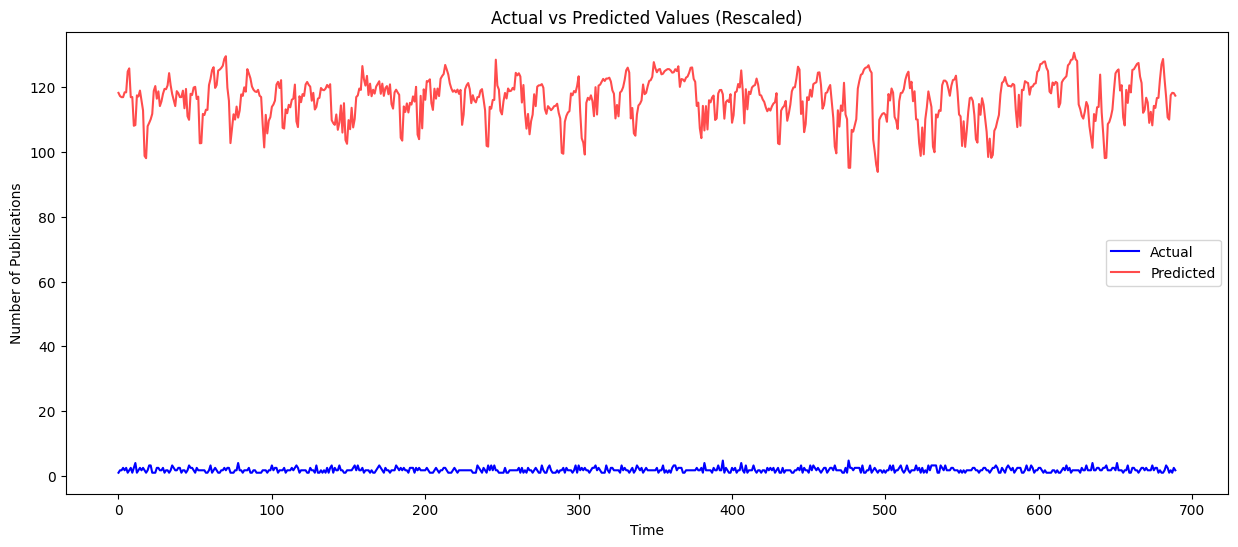

In [46]:
import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_cnn_gru_model.predict(X_test_windows)

# Fit a new scaler on the target variable only
target_scaler = MinMaxScaler()
target_scaler.fit(y_train.values.reshape(-1, 1))

# Inverse transform using the new scaler to get the original scale for both predicted and actual values
y_pred_rescaled = target_scaler.inverse_transform(y_pred).flatten()
y_test_rescaled = target_scaler.inverse_transform(y_test_windows_last_column.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_rescaled, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Values (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()







In [59]:
y_test_rescaled

array([1.        , 1.75062657, 1.75062657, 2.50125313, 1.75062657,
       2.50125313, 1.        , 1.75062657, 2.50125313, 1.        ,
       2.50125313, 4.00250627, 1.        , 1.75062657, 2.50125313,
       1.75062657, 2.50125313, 1.75062657, 1.        , 1.75062657,
       3.2518797 , 3.2518797 , 1.        , 1.        , 1.        ,
       2.50125313, 2.50125313, 1.75062657, 1.75062657, 2.50125313,
       1.        , 1.75062657, 1.75062657, 1.        , 1.75062657,
       3.2518797 , 2.50125313, 1.75062657, 1.75062657, 2.50125313,
       2.50125313, 1.        , 1.75062657, 1.75062657, 1.        ,
       1.75062657, 3.2518797 , 2.50125313, 2.50125313, 1.75062657,
       1.        , 2.50125313, 1.75062657, 1.75062657, 1.75062657,
       1.75062657, 1.75062657, 1.        , 1.        , 1.75062657,
       3.2518797 , 1.        , 1.75062657, 2.50125313, 1.75062657,
       1.        , 1.        , 1.75062657, 1.75062657, 2.50125313,
       1.75062657, 2.50125313, 2.50125313, 1.        , 1.     

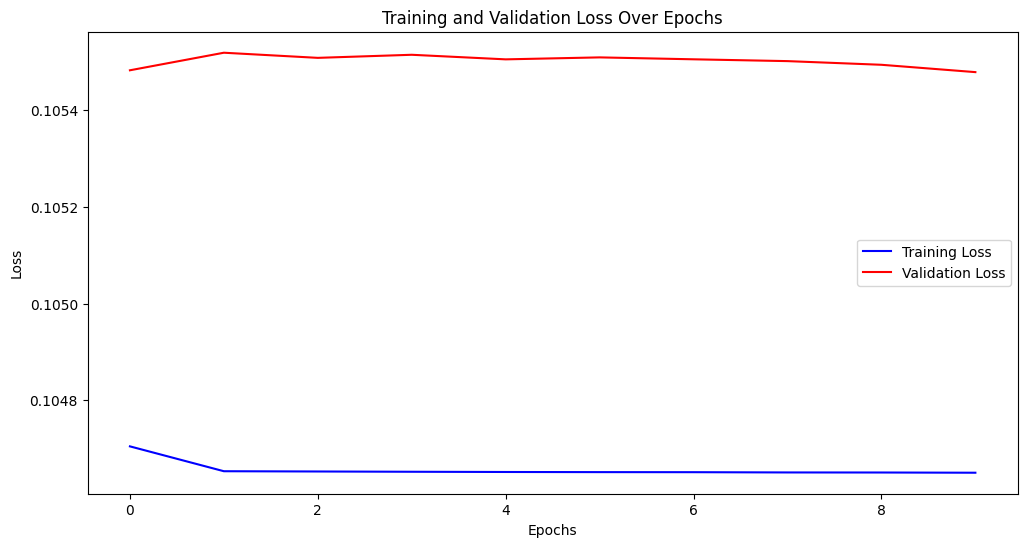

In [39]:
import matplotlib.pyplot as plt

# Extract loss and validation loss values
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
